In [1]:
import pandas as pd


In [11]:
df= pd.read_csv('wine.csv', names = ['주석산 농도', '아세트산 농도', '구연산 농도', '잔류 당분 농도','염화나트륨 농도','유리 아황산 농도','총 아황산 농도','밀도','pH','황산칼륨 농도','알코올 도수','와인의 맛','Class'])
df

,주석산 농도,아세트산 농도,구연산 농도,잔류 당분 농도,염화나트륨 농도,유리 아황산 농도,총 아황산 농도,밀도,pH,황산칼륨 농도,알코올 도수,와인의 맛,Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

df_pre= pd.read_csv('wine.csv', header = None)
df= df_pre.sample(frac=0.15)

In [41]:
X =df.values[:,0:12]
Y =df.values[:,12]
print(X.shape)

(975, 12)


In [42]:
#모델 설정
model = Sequential()
model.add(Dense(30, activation='relu', input_dim=X.shape[1]))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [43]:
#모델 컴파일

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint
#모델 저장 폴더 지정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#모델 저장 방법
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer =  ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
    
#모델 학습
history = model.fit(X, Y , validation_split=0.33, epochs=1000, batch_size=500)
model.summary()

Epoch 1/1000
2/2 [==============================] - 0s 135ms/step - loss: 2.0445 - accuracy: 0.7266 - val_loss: 1.3696 - val_accuracy: 0.7547
Epoch 2/1000
2/2 [==============================] - 0s 37ms/step - loss: 1.6065 - accuracy: 0.7193 - val_loss: 0.9768 - val_accuracy: 0.7547
Epoch 3/1000
2/2 [==============================] - 0s 26ms/step - loss: 1.1012 - accuracy: 0.7286 - val_loss: 0.6556 - val_accuracy: 0.7547
Epoch 4/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.7096 - accuracy: 0.7269 - val_loss: 0.7205 - val_accuracy: 0.6429
Epoch 5/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.7508 - accuracy: 0.5977 - val_loss: 0.8499 - val_accuracy: 0.4472
Epoch 6/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.8011 - accuracy: 0.5145 - val_loss: 0.5612 - val_accuracy: 0.7236
Epoch 7/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.5679 - accuracy: 0.7158 - val_loss: 0.4968 - val_accuracy: 0.7516
Epoch 8/1000

Epoch 116/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2244 - accuracy: 0.9267 - val_loss: 0.2006 - val_accuracy: 0.9130
Epoch 117/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.2212 - accuracy: 0.9287 - val_loss: 0.1997 - val_accuracy: 0.9130
Epoch 118/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.2220 - accuracy: 0.9267 - val_loss: 0.2000 - val_accuracy: 0.9130
Epoch 119/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2282 - accuracy: 0.9260 - val_loss: 0.2003 - val_accuracy: 0.9130
Epoch 120/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.2255 - accuracy: 0.9260 - val_loss: 0.2002 - val_accuracy: 0.9161
Epoch 121/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2260 - accuracy: 0.9273 - val_loss: 0.1998 - val_accuracy: 0.9161
Epoch 122/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.2216 - accuracy: 0.9267 - val_loss: 0.1997 - val_accuracy: 0.9161

2/2 [==============================] - 0s 24ms/step - loss: 0.1755 - accuracy: 0.9493 - val_loss: 0.1779 - val_accuracy: 0.9441
Epoch 231/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1767 - accuracy: 0.9466 - val_loss: 0.1686 - val_accuracy: 0.9472
Epoch 232/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1728 - accuracy: 0.9463 - val_loss: 0.1629 - val_accuracy: 0.9472
Epoch 233/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1745 - accuracy: 0.9415 - val_loss: 0.1620 - val_accuracy: 0.9441
Epoch 234/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1696 - accuracy: 0.9398 - val_loss: 0.1647 - val_accuracy: 0.9472
Epoch 235/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1767 - accuracy: 0.9439 - val_loss: 0.1732 - val_accuracy: 0.9503
Epoch 236/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1733 - accuracy: 0.9503 - val_loss: 0.1717 - val_accuracy: 0.9503
Epoch 237/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.1280 - accuracy: 0.9622 - val_loss: 0.1287 - val_accuracy: 0.9596
Epoch 345/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1330 - accuracy: 0.9544 - val_loss: 0.1283 - val_accuracy: 0.9596
Epoch 346/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1297 - accuracy: 0.9564 - val_loss: 0.1306 - val_accuracy: 0.9627
Epoch 347/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1257 - accuracy: 0.9635 - val_loss: 0.1407 - val_accuracy: 0.9534
Epoch 348/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1312 - accuracy: 0.9726 - val_loss: 0.1370 - val_accuracy: 0.9596
Epoch 349/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1233 - accuracy: 0.9706 - val_loss: 0.1264 - val_accuracy: 0.9627
Epoch 350/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1256 - accuracy: 0.9577 - val_loss: 0.1262 - val_accuracy: 0.9627
Epoch 351/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.1061 - accuracy: 0.9693 - val_loss: 0.1111 - val_accuracy: 0.9627
Epoch 459/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.1018 - accuracy: 0.9669 - val_loss: 0.1117 - val_accuracy: 0.9627
Epoch 460/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1067 - accuracy: 0.9716 - val_loss: 0.1191 - val_accuracy: 0.9658
Epoch 461/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1082 - accuracy: 0.9693 - val_loss: 0.1134 - val_accuracy: 0.9627
Epoch 462/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.1030 - accuracy: 0.9719 - val_loss: 0.1106 - val_accuracy: 0.9627
Epoch 463/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.1089 - accuracy: 0.9659 - val_loss: 0.1110 - val_accuracy: 0.9627
Epoch 464/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.1051 - accuracy: 0.9693 - val_loss: 0.1130 - val_accuracy: 0.9627
Epoch 465/1000

2/2 [==============================] - 0s 23ms/step - loss: 0.0845 - accuracy: 0.9763 - val_loss: 0.1061 - val_accuracy: 0.9627
Epoch 573/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0838 - accuracy: 0.9774 - val_loss: 0.1070 - val_accuracy: 0.9627
Epoch 574/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0909 - accuracy: 0.9754 - val_loss: 0.1024 - val_accuracy: 0.9658
Epoch 575/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0852 - accuracy: 0.9750 - val_loss: 0.1000 - val_accuracy: 0.9658
Epoch 576/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0866 - accuracy: 0.9699 - val_loss: 0.1030 - val_accuracy: 0.9658
Epoch 577/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0850 - accuracy: 0.9733 - val_loss: 0.1090 - val_accuracy: 0.9596
Epoch 578/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0924 - accuracy: 0.9730 - val_loss: 0.1005 - val_accuracy: 0.9658
Epoch 579/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.0724 - accuracy: 0.9777 - val_loss: 0.0947 - val_accuracy: 0.9720
Epoch 687/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0719 - accuracy: 0.9739 - val_loss: 0.0941 - val_accuracy: 0.9689
Epoch 688/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0746 - accuracy: 0.9770 - val_loss: 0.1120 - val_accuracy: 0.9689
Epoch 689/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0756 - accuracy: 0.9713 - val_loss: 0.0951 - val_accuracy: 0.9658
Epoch 690/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0715 - accuracy: 0.9760 - val_loss: 0.0950 - val_accuracy: 0.9720
Epoch 691/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0739 - accuracy: 0.9716 - val_loss: 0.0934 - val_accuracy: 0.9658
Epoch 692/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0712 - accuracy: 0.9757 - val_loss: 0.1100 - val_accuracy: 0.9720
Epoch 693/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0668 - accuracy: 0.9790 - val_loss: 0.0922 - val_accuracy: 0.9689
Epoch 744/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0638 - accuracy: 0.9797 - val_loss: 0.0941 - val_accuracy: 0.9689
Epoch 745/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0646 - accuracy: 0.9774 - val_loss: 0.0965 - val_accuracy: 0.9689
Epoch 746/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0657 - accuracy: 0.9757 - val_loss: 0.0992 - val_accuracy: 0.9689
Epoch 747/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0667 - accuracy: 0.9757 - val_loss: 0.0943 - val_accuracy: 0.9689
Epoch 748/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0653 - accuracy: 0.9760 - val_loss: 0.0939 - val_accuracy: 0.9689
Epoch 749/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0650 - accuracy: 0.9740 - val_loss: 0.0967 - val_accuracy: 0.9720
Epoch 750/1000

2/2 [==============================] - 0s 25ms/step - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.0938 - val_accuracy: 0.9814
Epoch 858/1000
2/2 [==============================] - 0s 23ms/step - loss: 0.0584 - accuracy: 0.9760 - val_loss: 0.0894 - val_accuracy: 0.9720
Epoch 859/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0541 - accuracy: 0.9831 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 860/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0570 - accuracy: 0.9794 - val_loss: 0.0992 - val_accuracy: 0.9783
Epoch 861/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0548 - accuracy: 0.9774 - val_loss: 0.0907 - val_accuracy: 0.9720
Epoch 862/1000
2/2 [==============================] - 0s 26ms/step - loss: 0.0560 - accuracy: 0.9801 - val_loss: 0.0921 - val_accuracy: 0.9689
Epoch 863/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0567 - accuracy: 0.9780 - val_loss: 0.0913 - val_accuracy: 0.9720
Epoch 864/1000

2/2 [==============================] - 0s 26ms/step - loss: 0.0458 - accuracy: 0.9841 - val_loss: 0.0962 - val_accuracy: 0.9752
Epoch 972/1000
2/2 [==============================] - 0s 27ms/step - loss: 0.0476 - accuracy: 0.9784 - val_loss: 0.0961 - val_accuracy: 0.9752
Epoch 973/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0483 - accuracy: 0.9777 - val_loss: 0.0924 - val_accuracy: 0.9752
Epoch 974/1000
2/2 [==============================] - 0s 25ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.0921 - val_accuracy: 0.9752
Epoch 975/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0510 - accuracy: 0.9817 - val_loss: 0.0955 - val_accuracy: 0.9752
Epoch 976/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0468 - accuracy: 0.9774 - val_loss: 0.0920 - val_accuracy: 0.9752
Epoch 977/1000
2/2 [==============================] - 0s 24ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0916 - val_accuracy: 0.9752
Epoch 978/1000

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

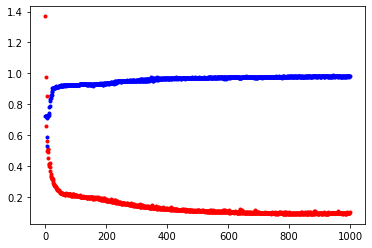

In [47]:
# 모델 반복횟수에 따른 정확도 및 loss를 그래프로 확인
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']

x_len = np.arange(len(y_acc))


plt.plot(x_len, y_vloss, 'o', c='red',markersize=3)
plt.plot(x_len, y_acc, 'o', c='blue',markersize=3)

plt.show()

In [ ]:
#학습 조기 종료 시키기

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics= ['accuracy'])

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#모델 저장 폴더 지정
MODEL_DIR='./model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

#모델 저장 방법
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer =  ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

#학습 조기 종료
early_stopping_callback= EarlyStopping(monitor='val_loss', patience=100)
    
#모델 학습
history = model.fit(X, Y , validation_split=0.33, epochs=1000, batch_size=500, callbacks=[checkpointer, early_stopping_callback])
model.summary()

In [ ]:
#학습기 불러오기
from keras.models import load_model
# model.save('09-0.0902.hdf5')
model= load_model('./model/09-0.0902.hdf5')

#학습할 데이터 설정
df = pd.read_csv('wine.csv', header = None)
X =df.values[:,0:12]
Y =df.values[:,12]

# print(Y)
#평가
print(model.evaluate(X,Y))

#예측
prediction = model.predict(X)
# print(prediction)
와인번호 =int(input('와인 번호'))
와인 = prediction[와인번호]
p=와인[0]*100
print(f'{와인번호}번째 와인이 화이트 와인일 확률은 {p}%입니다.')

204/204 [==============================] - 0s 476us/step - loss: 0.0738 - accuracy: 0.9771
[0.07381108403205872, 0.9770663380622864]
